<a href="https://colab.research.google.com/github/Fidelisaboke/robust-nids/blob/eda/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on the TII-SSRC-23 Dataset
- This notebook performs EDA on the TII-SSRC-23 dataset, curated by Herzalla et. at (2023)
- Dataset Link: [TII-SSRC-23](https://www.kaggle.com/datasets/daniaherzalla/tii-ssrc-23)


## Mount Google Drive for Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Datasets/TII-SSRC-23/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Sample Dataset
- The dataset is very large, hence the need to load a small sample size for EDA

In [3]:
num_rows = 50_000
df = pd.read_csv(DATA_PATH, nrows=num_rows)
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.90-192.168.1.3-53930-64738-6,192.168.1.90,53930.0,192.168.1.3,64738,6.0,01/01/1970 07:41:46 AM,52601173.0,1701.0,1793.0,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
1,192.168.1.3-192.168.1.90-64738-37700-6,192.168.1.3,64738.0,192.168.1.90,37700,6.0,01/01/1970 07:41:46 AM,119106942.0,36.0,57.0,...,3.416174e+06,19996926.0,14078617.0,5001511.0,1737.400069,5003516.0,5000449.0,Benign,Audio,Audio
2,192.168.1.3-192.168.1.90-22-40854-6,192.168.1.3,22.0,192.168.1.90,40854,6.0,01/01/1970 07:41:46 AM,5589.0,1.0,1.0,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
3,192.168.1.70-192.168.1.3-55422-64738-6,192.168.1.70,55422.0,192.168.1.3,64738,6.0,01/01/1970 07:41:47 AM,118166562.0,3932.0,4196.0,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
4,192.168.1.90-192.168.1.3-59658-64738-17,192.168.1.90,59658.0,192.168.1.3,64738,17.0,01/01/1970 07:41:50 AM,119988385.0,25.0,6795.0,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio


## Dataset Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     50000 non-null  object 
 1   Src IP                      50000 non-null  object 
 2   Src Port                    50000 non-null  float64
 3   Dst IP                      50000 non-null  object 
 4   Dst Port                    50000 non-null  int64  
 5   Protocol                    50000 non-null  float64
 6   Timestamp                   50000 non-null  object 
 7   Flow Duration               50000 non-null  float64
 8   Total Fwd Packet            50000 non-null  float64
 9   Total Bwd packets           50000 non-null  float64
 10  Total Length of Fwd Packet  50000 non-null  float64
 11  Total Length of Bwd Packet  50000 non-null  float64
 12  Fwd Packet Length Max       50000 non-null  float64
 13  Fwd Packet Length Min       500

## Statistical Summary

In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,...,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,40755.121380,1060.852340,14.091880,1.912368e+07,27.034220,24.947880,1620.476280,1.130806e+04,327.38830,42.256620,...,8.355820,14.239040,1.254929e+06,4.674825e+05,1.671211e+06,8.737240e+05,5.142602e+06,1.517609e+06,6.932076e+06,3.859498e+06
std,16066.385234,7192.642923,4.863644,2.524086e+07,1417.707351,672.963329,11320.473702,1.305528e+05,471.53528,99.535573,...,103.232309,10.526072,2.487072e+06,1.218603e+06,3.285018e+06,2.019093e+06,6.887011e+06,3.245376e+06,9.712304e+06,5.612460e+06
min,0.000000,0.000000,0.000000,1.500000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,35102.000000,0.000000,6.000000,7.083000e+03,1.000000,0.000000,42.000000,0.000000e+00,39.00000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43870.000000,23.000000,17.000000,8.226620e+06,3.000000,1.000000,55.000000,4.300000e+01,49.00000,45.000000,...,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52706.500000,53.000000,17.000000,4.150138e+07,9.000000,2.000000,1944.000000,6.400000e+01,500.00000,50.000000,...,7.000000,32.000000,2.199693e+06,0.000000e+00,2.914876e+06,6.934432e+05,1.000825e+07,1.812278e+06,1.304162e+07,7.178468e+06
max,65531.000000,64738.000000,17.000000,1.199996e+08,314483.000000,140243.000000,519561.000000,1.687288e+06,1368.00000,1348.000000,...,5015.000000,44.000000,8.531760e+07,7.069981e+07,9.998708e+07,8.531760e+07,1.151276e+08,6.685070e+07,1.151276e+08,1.151276e+08


## Checking for duplicates

In [ ]:
df.nunique()

,0
Flow ID,40225
Src IP,4
Src Port,30541
Dst IP,4
Dst Port,671
...,...
Idle Max,20452
Idle Min,20325
Label,2
Traffic Type,4


## Univariate Analysis

### 1. Distribution of Protocols

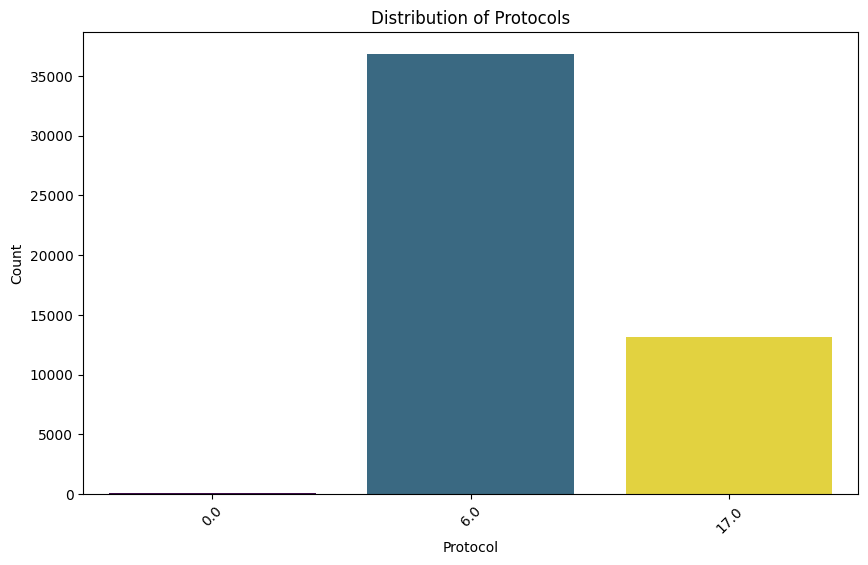

In [4]:
protocols_counts = df['Protocol'].value_counts()
labels = df['Protocol'].unique()

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=protocols_counts, palette='viridis', hue=labels, legend=False)
plt.title('Distribution of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 2. Forward vs Backward Flows

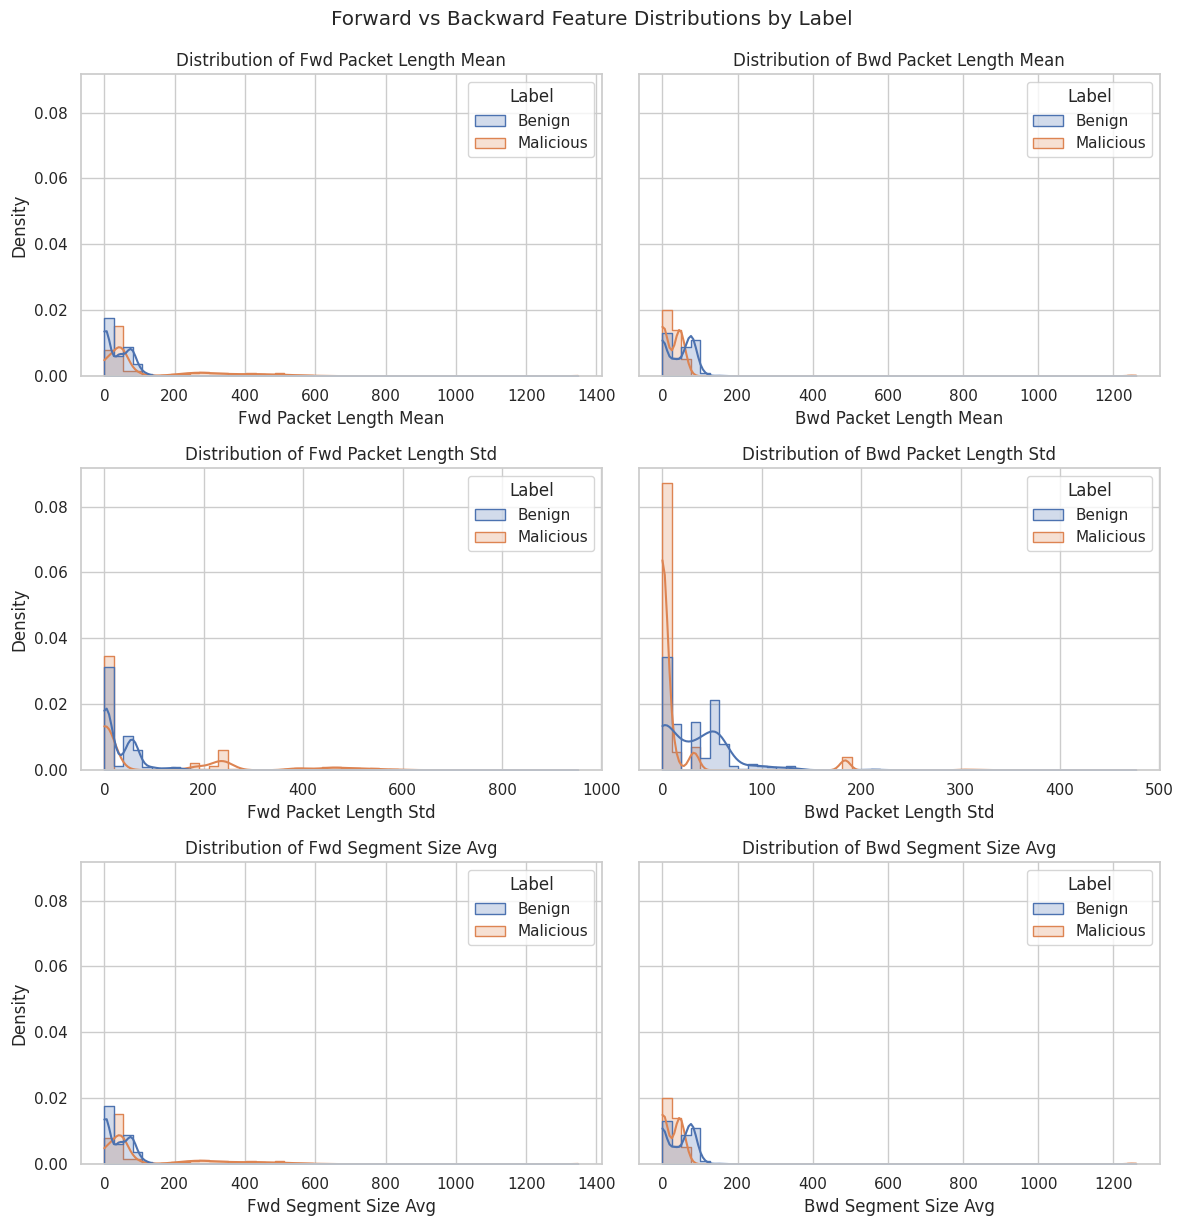

In [6]:
sns.set(style="whitegrid")

feature_pairs = [
  ("Fwd Packet Length Mean", "Bwd Packet Length Mean"),
  ("Fwd Packet Length Std", "Bwd Packet Length Std"),
  ("Fwd Segment Size Avg", "Bwd Segment Size Avg"),
]

n_pairs = len(feature_pairs)

fig, ax = plt.subplots(
    nrows=n_pairs,
    ncols=2,
    figsize=(12, 4 * n_pairs),
    sharey=True
)

for i, (fwd_feat, bwd_feat) in enumerate(feature_pairs):
  ax_fwd = ax[i, 0]
  ax_bwd = ax[i, 1]

  sns.histplot(data=df, x=fwd_feat, hue="Label", bins=50, kde=True,
               stat="density", element="step", common_norm=False, ax=ax_fwd)
  ax_fwd.set_title(f"Distribution of {fwd_feat}")
  ax_fwd.set_xlabel(fwd_feat)
  ax_fwd.set_ylabel("Density")

  sns.histplot(data=df, x=bwd_feat, hue="Label", bins=50, kde=True,
               stat="density", element="step", common_norm=False, ax=ax_bwd)
  ax_bwd.set_title(f"Distribution of {bwd_feat}")
  ax_bwd.set_xlabel(bwd_feat)

plt.tight_layout()
fig.suptitle("Forward vs Backward Feature Distributions by Label", y=1.02)
plt.show()


### 3. Flag Counts

In [7]:
# Flag features
flag_cols = [
    "FIN Flag Count", "SYN Flag Count", "RST Flag Count",
    "PSH Flag Count", "ACK Flag Count", "URG Flag Count",
    "CWR Flag Count", "ECE Flag Count"
]

# Compute for each flag, for each class, how many non-zero flags
non_zero_stats = {}
for flag in flag_cols:
  stats = df.groupby('Label')[flag].apply(lambda x: (x > 0).sum())
  total = df.groupby('Label')[flag].size()
  proportion = stats / total
  non_zero_stats[flag] = pd.DataFrame({
      'Count': stats,
      'Total': total,
      'Proportion': proportion
  })

  non_zero_df = pd.concat(non_zero_stats, axis=0)
  print(non_zero_df)

                          Count  Total  Proportion
               Label                              
FIN Flag Count Benign        39    222    0.175676
               Malicious  12380  49778    0.248704
                          Count  Total  Proportion
               Label                              
FIN Flag Count Benign        39    222    0.175676
               Malicious  12380  49778    0.248704
SYN Flag Count Benign        56    222    0.252252
               Malicious   8104  49778    0.162803
                          Count  Total  Proportion
               Label                              
FIN Flag Count Benign        39    222    0.175676
               Malicious  12380  49778    0.248704
SYN Flag Count Benign        56    222    0.252252
               Malicious   8104  49778    0.162803
RST Flag Count Benign        19    222    0.085586
               Malicious   2530  49778    0.050826
                          Count  Total  Proportion
               Label           

- Plotting non-zero proportions of each flag vs class

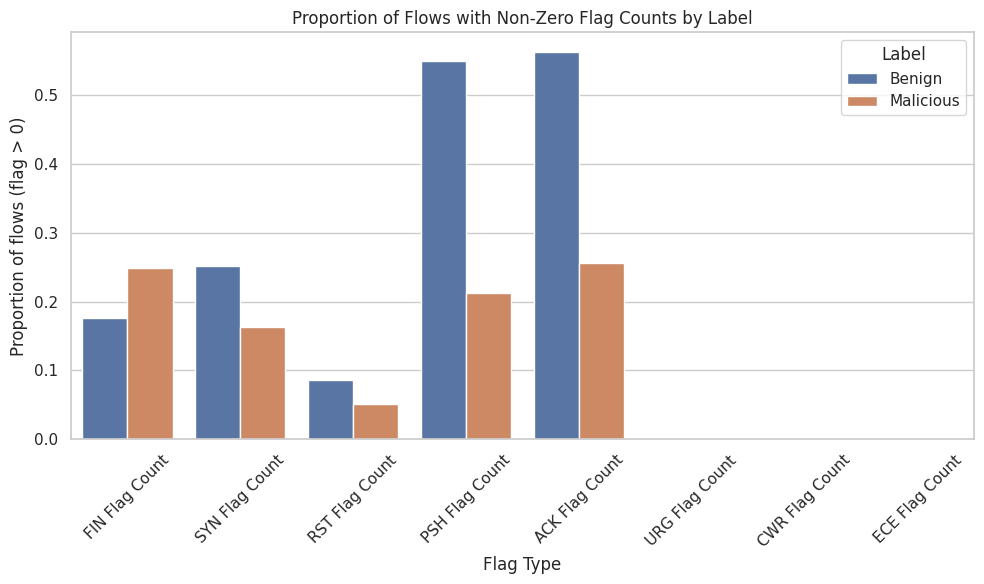

In [10]:
rows = []
for flag in flag_cols:
  for label in df['Label'].unique():
    non_zero_count = ((df['Label'] == label) & (df[flag] > 0)).sum()
    total_count = (df['Label'] == label).sum()
    rows.append({
        'Flag': flag,
        'Label': label,
        'Proportion': non_zero_count / total_count
    })

plot_df = pd.DataFrame(rows)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Flag', y='Proportion', hue='Label')
plt.title("Proportion of Flows with Non-Zero Flag Counts by Label")
plt.xticks(rotation=45)
plt.ylabel("Proportion of flows (flag > 0)")
plt.xlabel("Flag Type")
plt.tight_layout()
plt.show()

### 4. Down/Up Ratio

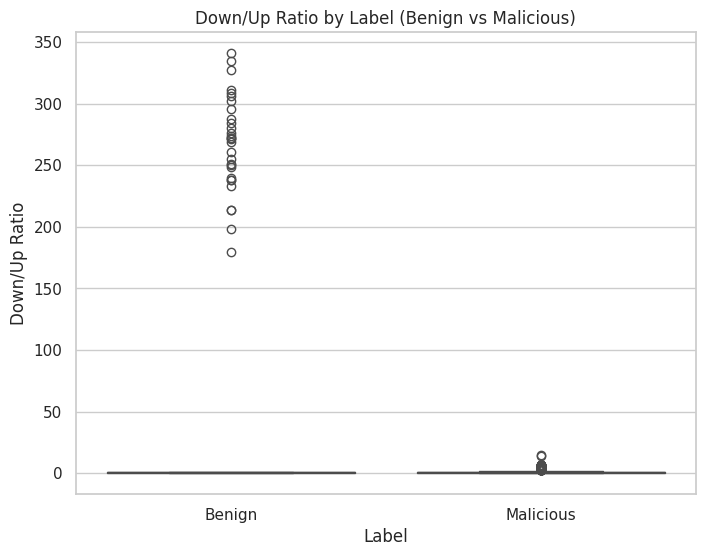

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Label', y='Down/Up Ratio')
plt.title("Down/Up Ratio by Label (Benign vs Malicious)")
plt.ylabel("Down/Up Ratio")
plt.xlabel("Label")
plt.show()

- Violin Plot of Down/Up Ratio

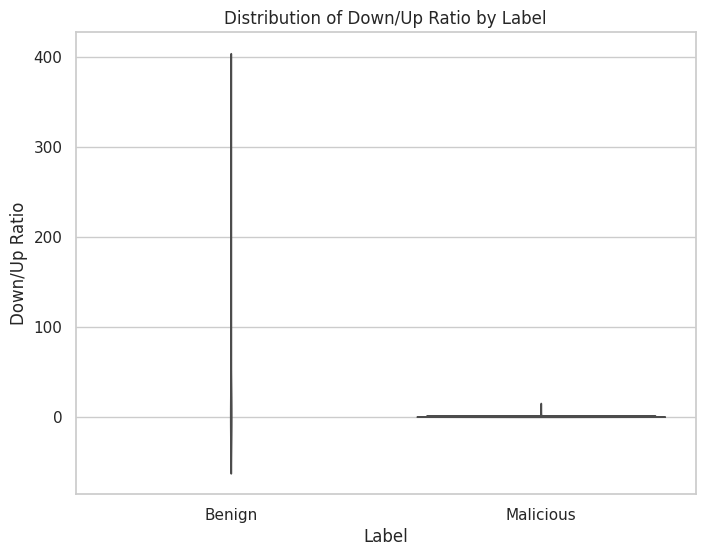

In [15]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Label', y='Down/Up Ratio', inner='quartile')
plt.title("Distribution of Down/Up Ratio by Label")
plt.show()

### 5. Indicative Flags (Check for most discriminative)

In [13]:
# For each flag, compute difference in proportion non-zero between classes
indicative = []
for flag in flag_cols:
    prop_benign = ((df['Label'] == 'Benign') & (df[flag] > 0)).sum() / (df['Label'] == 'Benign').sum()
    prop_mal = ((df['Label'] == 'Malicious') & (df[flag] > 0)).sum() / (df['Label'] == 'Malicious').sum()
    delta = prop_mal - prop_benign
    indicative.append({'Flag': flag, 'PropBenign': prop_benign, 'PropMalicious': prop_mal, 'Delta': delta})

indicative_df = pd.DataFrame(indicative).sort_values(by='Delta', ascending=False)
print(indicative_df)

             Flag  PropBenign  PropMalicious     Delta
0  FIN Flag Count    0.175676       0.248704  0.073029
7  ECE Flag Count    0.000000       0.000000  0.000000
6  CWR Flag Count    0.000000       0.000000  0.000000
5  URG Flag Count    0.000000       0.000000  0.000000
2  RST Flag Count    0.085586       0.050826 -0.034760
1  SYN Flag Count    0.252252       0.162803 -0.089449
4  ACK Flag Count    0.563063       0.256760 -0.306303
3  PSH Flag Count    0.549550       0.212925 -0.336624


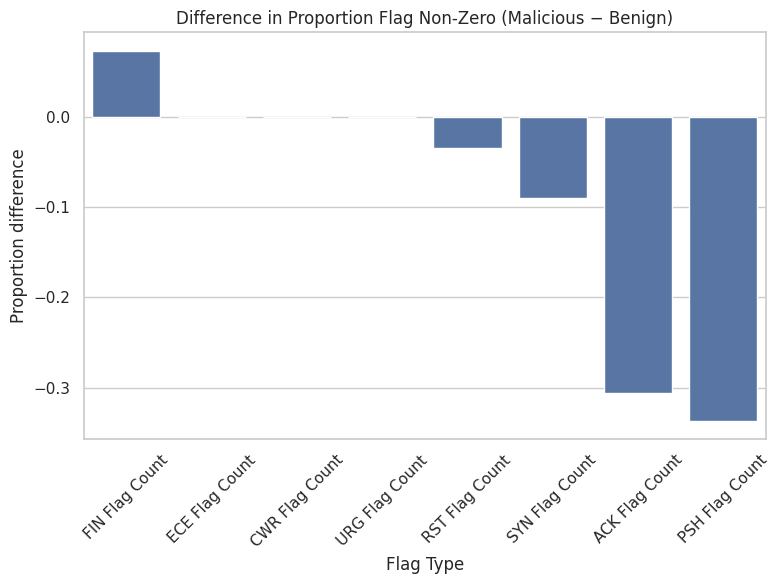

In [14]:
# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(data=indicative_df, x='Flag', y='Delta')
plt.title("Difference in Proportion Flag Non-Zero (Malicious − Benign)")
plt.xticks(rotation=45)
plt.ylabel("Proportion difference")
plt.xlabel("Flag Type")
plt.tight_layout()
plt.show()

## Correlation Analysis

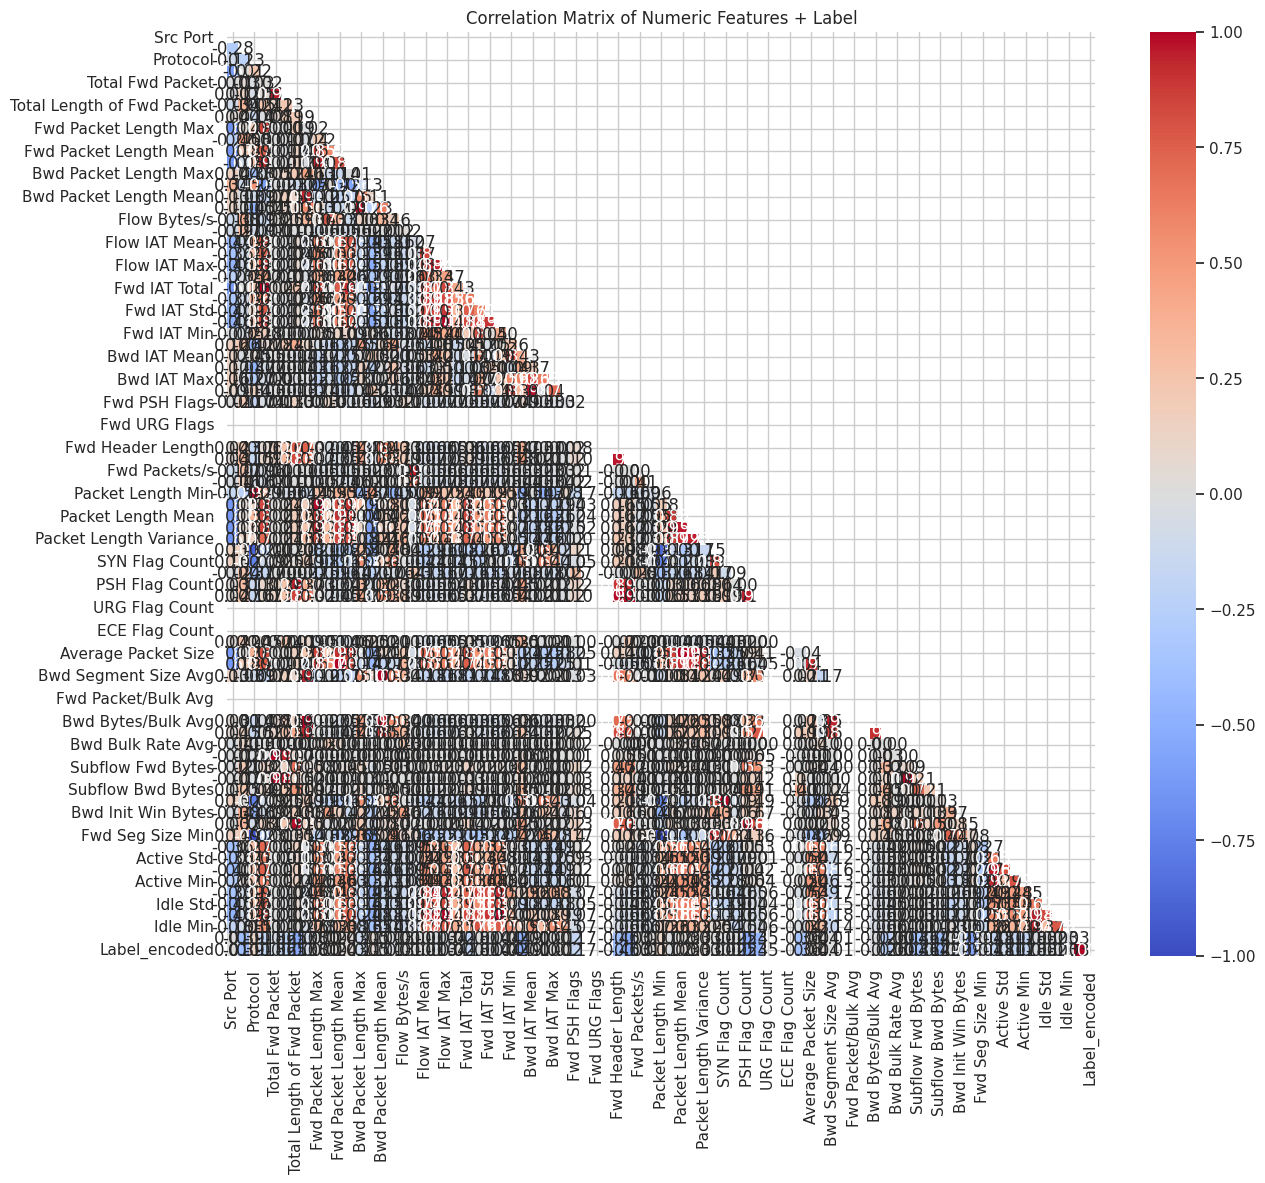

In [20]:
numeric_cols = df.select_dtypes(include=['float64','float32','int64','int32']).columns.tolist()
df['Label_encoded'] = df['Label'].map({'Benign':0, 'Malicious':1})  # Label Encoding

numeric_cols_with_label = numeric_cols + ['Label_encoded']

# Correlation matrix
corr_matrix = df[numeric_cols_with_label].corr(method='pearson')

# Mask upper triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features + Label")
plt.show()


